In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import sys

In [10]:
%run -i functions.py

Functions Loaded!


In [11]:
path = 'C:/Users/chris.hughes/Documents/git/scs/data/'

In [18]:
av_raw = pd.read_csv(path+"Availability_for_ML.csv")
fa_nov = pd.read_csv(path+"SCS_Alerts_NOV.csv")
fa_oct = pd.read_csv(path+"SCS_Alerts_OCT.csv")

data = pre_process_av_and_fa_oct_nov(av_raw,fa_oct,fa_nov,remove_same_location_faults = True)

fa = data['faults']
av = data['availability']

fa = floor_time(fa,'Entry time',units='H') 

fa = faults_aggregate_and_pivot(df=fa,
                                time_col='Entry time',
                                fault_level='fault ID type',
                                agg_col='Duration',
                                agg_type='sum',#can use mean/count/sum
                                quadrant=None) # by default all quadrants are kept

av = availability_quadrant_mean(df=av,
                                time_col='Datetime',
                                quadrant=None) # by default all quadrants are kept

df = merge_av_fa(av_df=av,
                 fa_df=fa,
                 min_date=None, 
                 max_date=None) #specify min/max date if you want to filter data by date


#remove columns with only zeros (faults that did not happen in this period of time or quadrant)
df = df.loc[:, (df != 0).any(axis=0)]
df.head()

Quadrants Assigned
duplicated location faults removed - max duration kept
Fault and availability data pre-processed
Dates floored
Faults aggregated and pivoted
Availability data aggregated by quadrant
Availability and fault datasets merged


,Datetime,Downtime,0,3000,3104,3107,3114,3211,3222,3415,...,11656,11816,11822,11823,11824,11848,12008,12014,12015,12016
0,2020-10-16 06:00:00,0.370236,331,0,347,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-10-16 07:00:00,0.327088,466,0,1700,0.0,0,0.0,0,0,...,4,0,30,0,0,0,0,80,0,0
2,2020-10-16 08:00:00,0.234701,167,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-10-16 09:00:00,0.168205,671,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-10-16 10:00:00,0.231875,276,0,0,0.0,0,0.0,0,0,...,0,0,0,0,0,7,0,0,63,0


      Importance
5105    0.227485
5329    0.068986
3419    0.062469
5120    0.054794
3420    0.046025
5100    0.041905
3429    0.037200
3416    0.037004
3504    0.036353
3611    0.030750

              D_Tree         RF  RF Reduced
MAE        0.149475   0.113769    0.115864
MSE       0.0379756   0.021191    0.019871
RMSE       0.194873   0.145571    0.140965
MAPE%         45.85  36.580000   43.660000
ACC%          54.15  63.420000   56.340000
OOB             N/A   0.278155    0.240620
R2_Train          1   0.898672    0.895794
R2_Pred   -0.484423   0.171667    0.220456


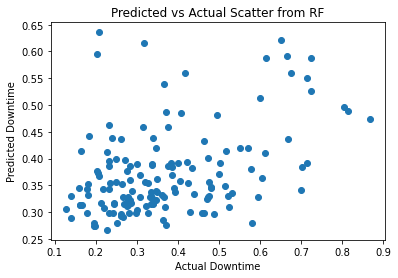

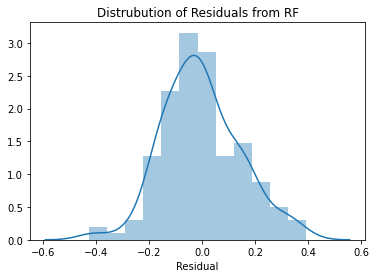

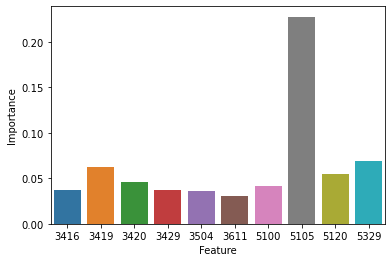

In [7]:
#df = df.reset_index()
run_model(df,num_trees=100,visualise=False)